# Online Gaming

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# yahoo finance data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# Online Gaming
title = "Online Gaming"
symbols = ['EA', 'NTDOY', 'ESPO', 'IGGGF', 'SCPL', 'TTWO', 'ATVI', 'ZNGA', 'NEXOF', 'CZR', 'YY', 'CHDN', 'MOMO', 'IGT', 'GLUU', 'CYOU', 'SOHU', 'CMC']
start = '2018-01-01'
end = '2020-06-26'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
2 years


In [5]:
number_of_years = delta.years

In [6]:
days = (df.index[-1] - df.index[0]).days
days

905

In [7]:
df.head()

EA      NTDOY  ESPO     IGGGF  SCPL        TTWO  \
Date                                                                  
2018-01-02  109.449997  44.045223   NaN  0.825251   NaN  112.879997   
2018-01-03  109.750000  45.043194   NaN  0.825251   NaN  113.879997   
2018-01-04  107.190002  46.578537   NaN  0.825251   NaN  114.019997   
2018-01-05  112.389999  45.513390   NaN  0.825251   NaN  116.910004   
2018-01-08  113.220001  45.647736   NaN  0.825251   NaN  117.370003   

                 ATVI  ZNGA      NEXOF    CZR          YY       CHDN  \
Date                                                                   
2018-01-02  63.055592  3.92  12.058393  12.45  121.459999  78.517570   
2018-01-03  64.036087  4.02  12.058393  12.48  119.360001  78.451607   
2018-01-04  63.398773  3.89  12.058393  12.90  121.930000  78.039307   
2018-01-05  65.075409  3.89  12.058393  12.85  128.100006  79.012321   
2018-01-08  65.330338  3.91  12.058393  12.65  129.270004  79.177246   

                 MOMO        IGT  GLUU       CYOU       SOHU        CMC  
Date                                                                     
2018-01-02  24.564751  23.521132  3.63  12.266425  45.580002  21.397432  
2018-01-03  24.602745  23.406864  3.65  12.136746  44.990002  22.835211  
2018-01-04  25.524164  23.644188  3.67  12.070243  45.240002  23.004358  
2018-01-05  26.436077  24.408888  3.81  11.930589  46.410000  23.399038  
2018-01-08  26.540569  24.259468  3.80  12.236500  46.820000  23.756136

In [8]:
df.tail()

EA      NTDOY       ESPO    IGGGF   SCPL        TTWO  \
Date                                                                       
2020-06-19  130.190002  58.590000  50.959999  0.80000  13.96  142.610001   
2020-06-22  129.720001  58.500000  51.790001  0.82500  14.25  141.139999   
2020-06-23  130.600006  56.820000  52.310001  0.78500  14.37  143.369995   
2020-06-24  130.869995  56.439999  51.630001  0.79496  14.54  139.869995   
2020-06-25  130.740005  55.930000  51.820000  0.79000  14.66  140.399994   

                 ATVI  ZNGA      NEXOF    CZR         YY        CHDN  \
Date                                                                   
2020-06-19  76.580002  9.29  21.980000  12.28  97.230003  133.509995   
2020-06-22  76.120003  9.44  21.980000  12.09  97.129997  135.750000   
2020-06-23  76.449997  9.57  21.980000  12.45  96.980003  141.699997   
2020-06-24  75.580002  9.48  21.980000  12.05  93.629997  132.690002   
2020-06-25  76.209999  9.61  23.549999  11.95  94.370003  133.949997   

                 MOMO   IGT  GLUU  CYOU  SOHU        CMC  
Date                                                      
2020-06-19  19.969999  9.08  9.31   NaN  9.38  20.299999  
2020-06-22  19.139999  8.91  9.27   NaN  9.33  20.580000  
2020-06-23  19.219999  9.47  9.48   NaN  9.68  20.549999  
2020-06-24  18.459999  9.07  9.25   NaN  9.02  19.639999  
2020-06-25  17.820000  8.78  9.41   NaN  9.38  20.180000

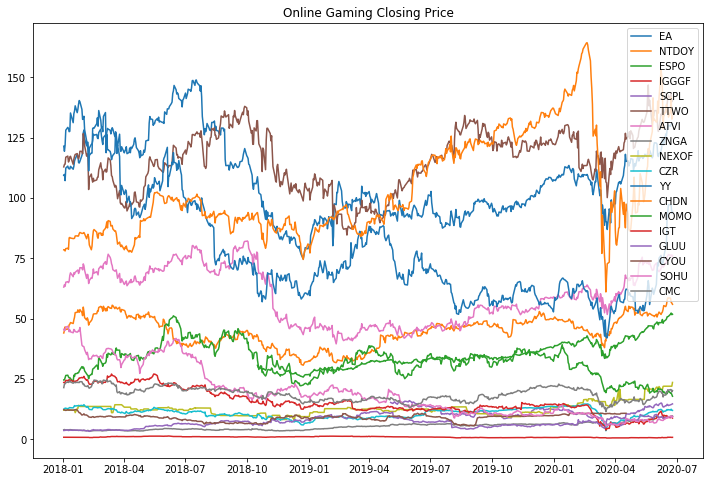

In [9]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title(title + ' Closing Price')
plt.legend(labels=df.columns)

In [10]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

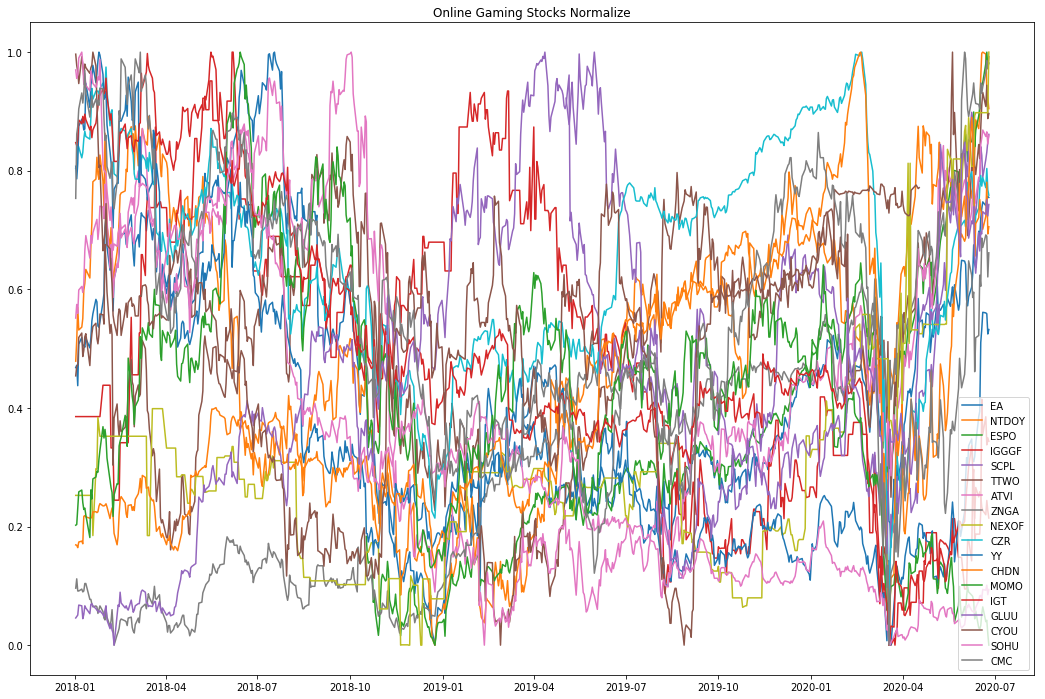

In [11]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title(title + ' Stocks Normalize')
plt.legend(labels=normalize.columns)

In [12]:
stock_rets = df.pct_change().dropna()

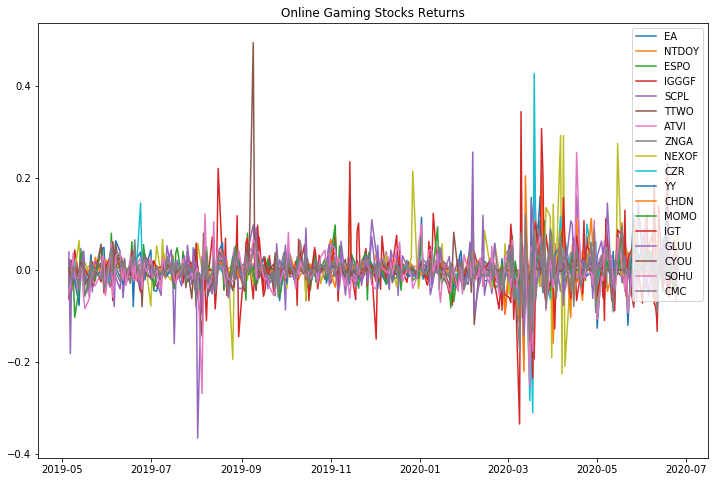

In [13]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title(title + ' Stocks Returns')
plt.legend(labels=stock_rets.columns)

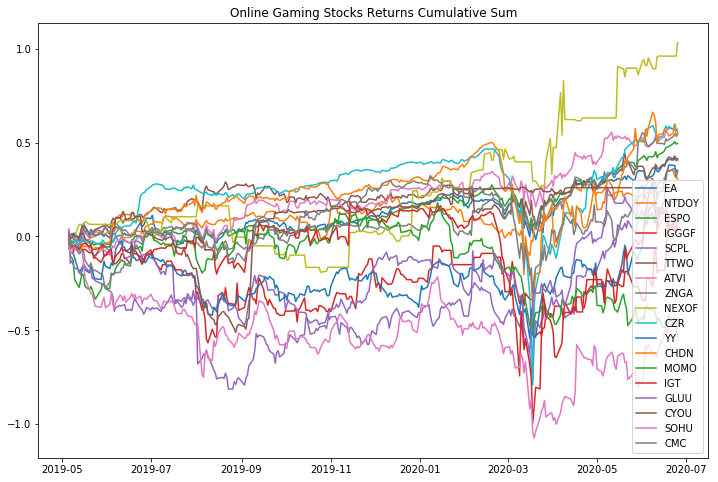

In [14]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title(title + ' Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

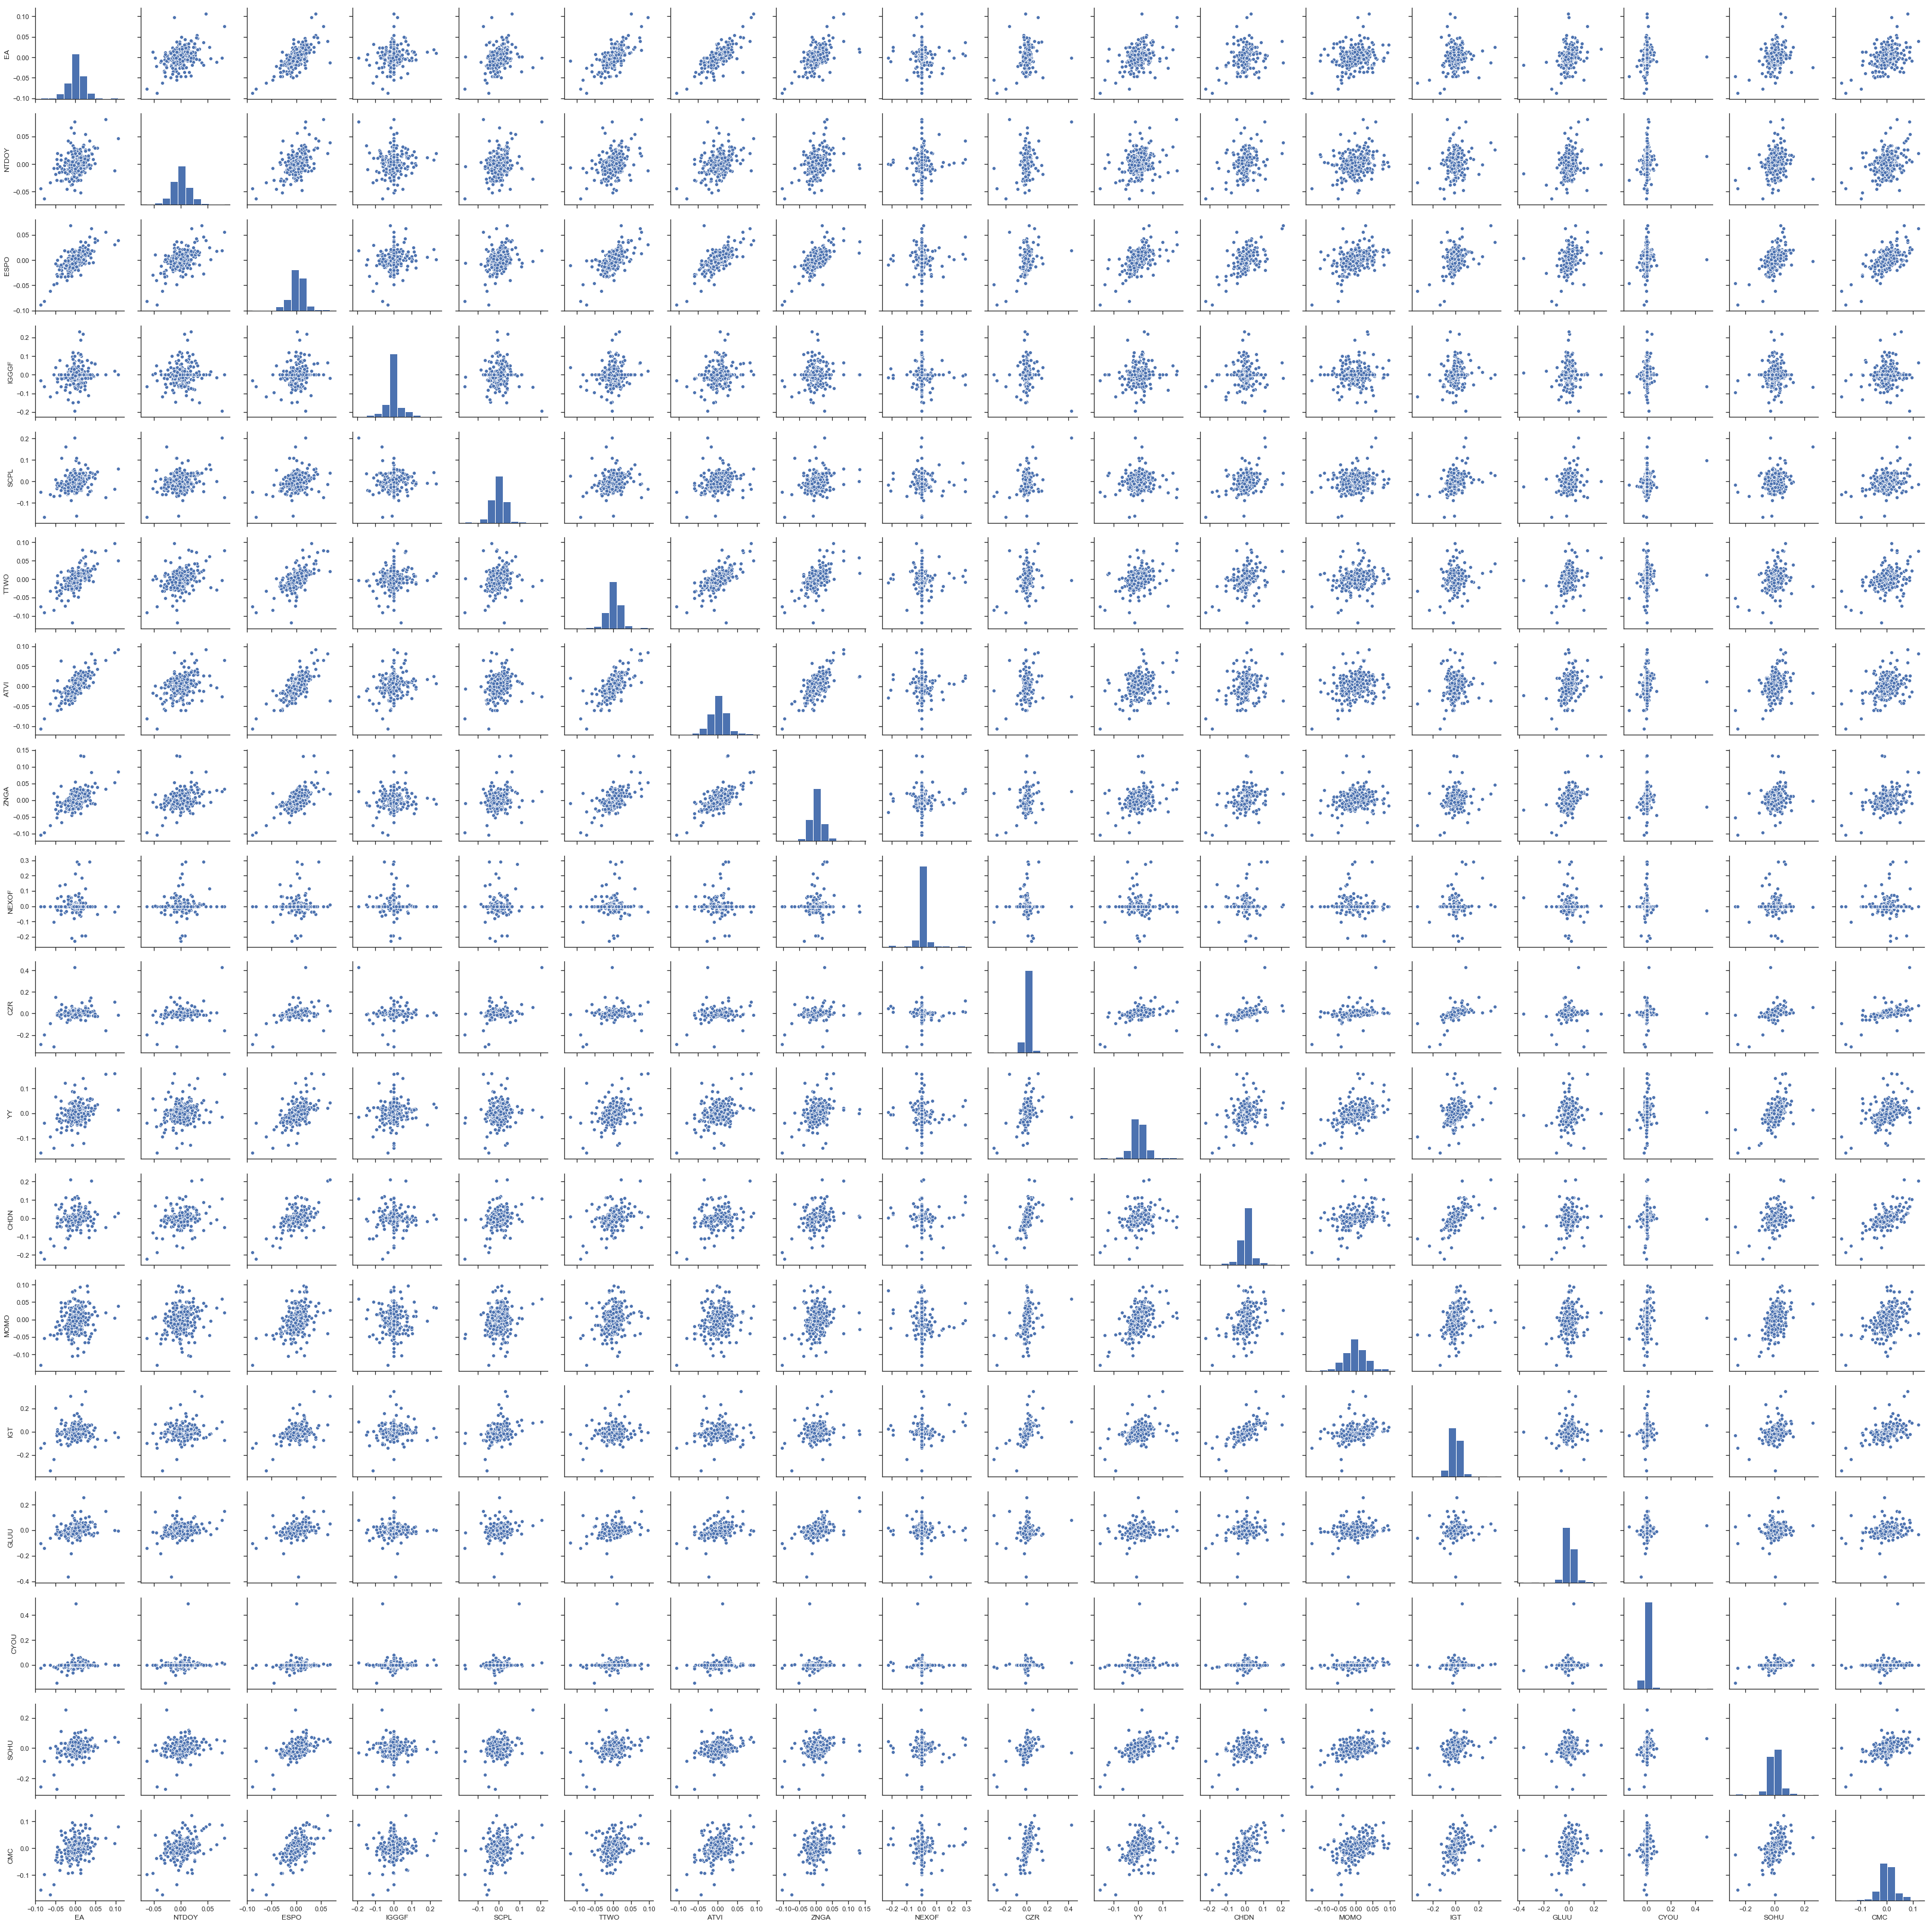

In [15]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

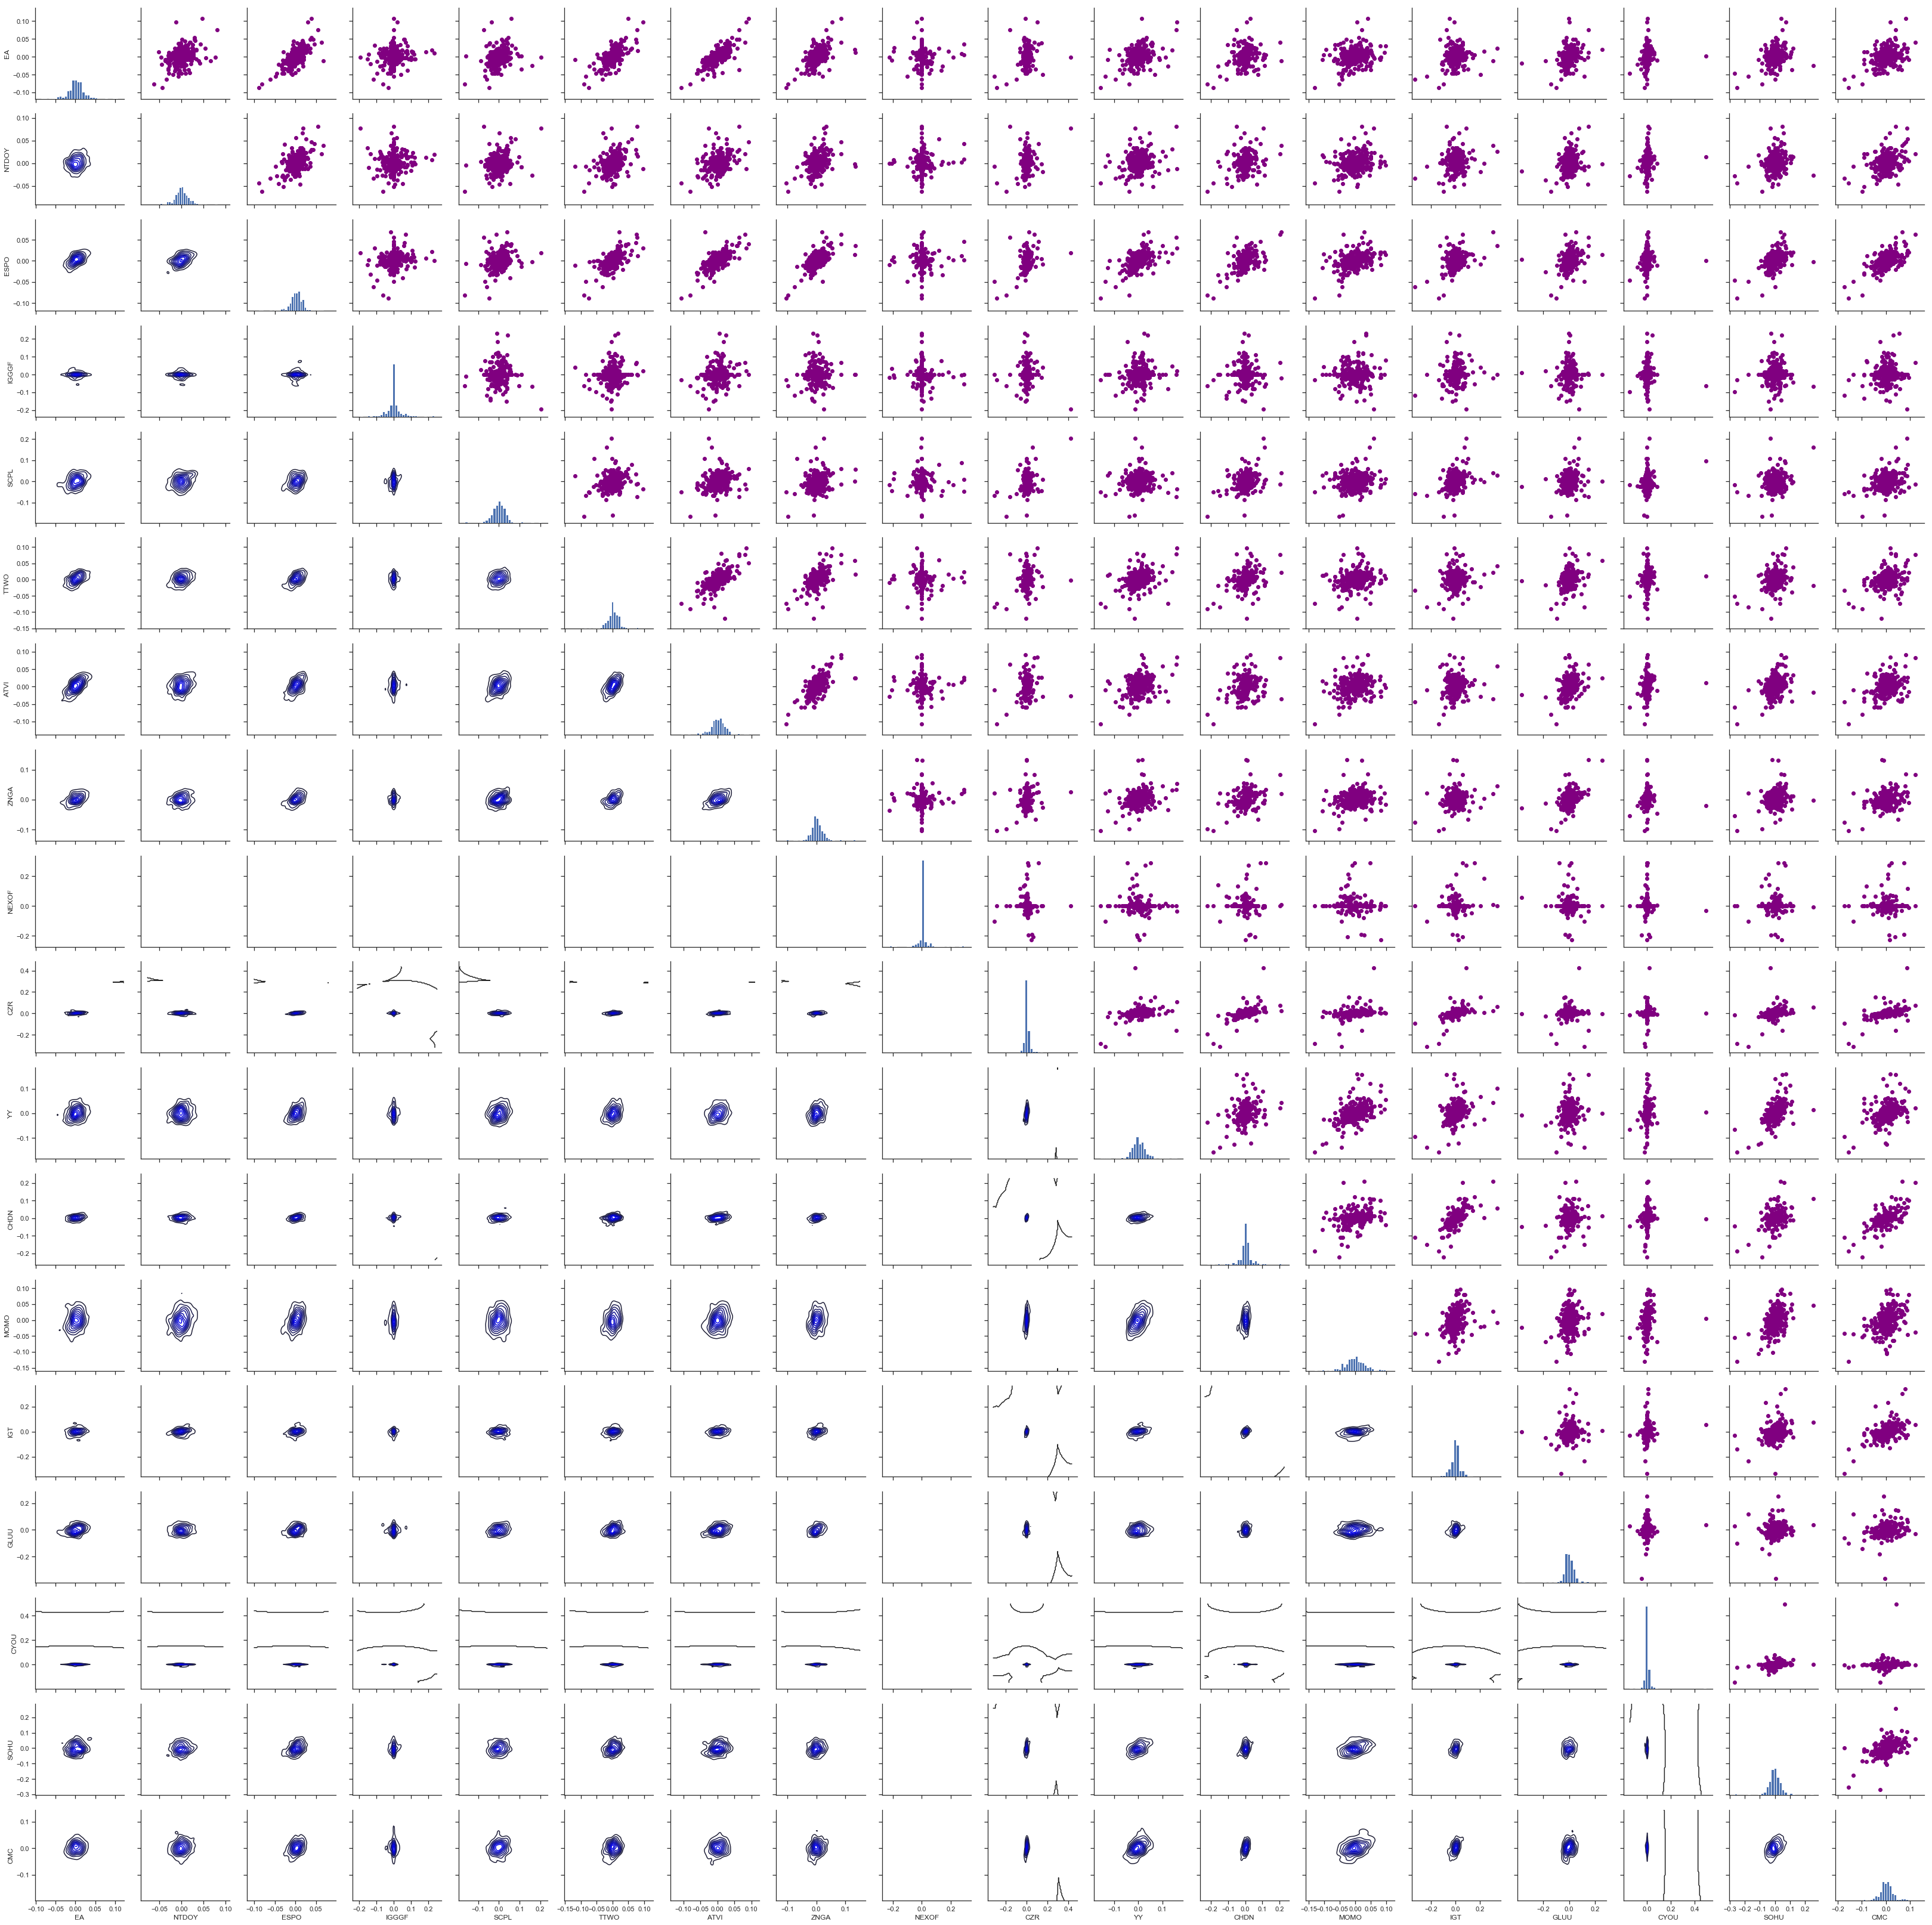

In [16]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

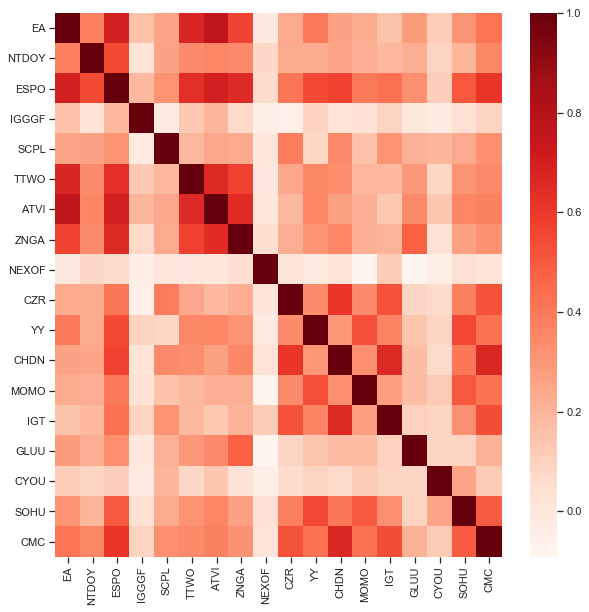

In [17]:
plt.figure(figsize=(10,10))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

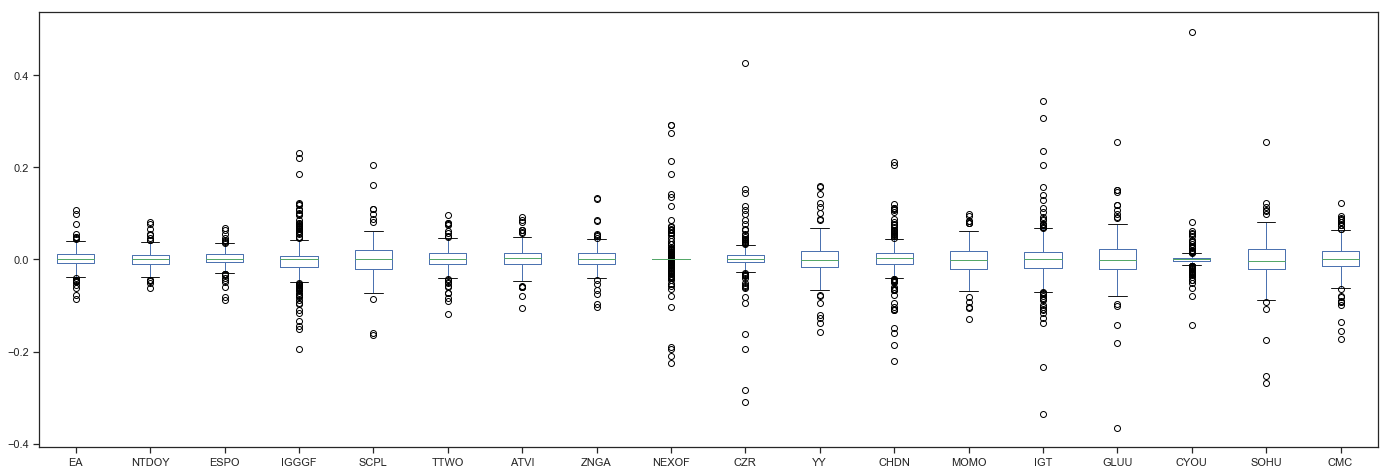

In [18]:
# Box plot
stock_rets.plot(kind='box',figsize=(24,8))

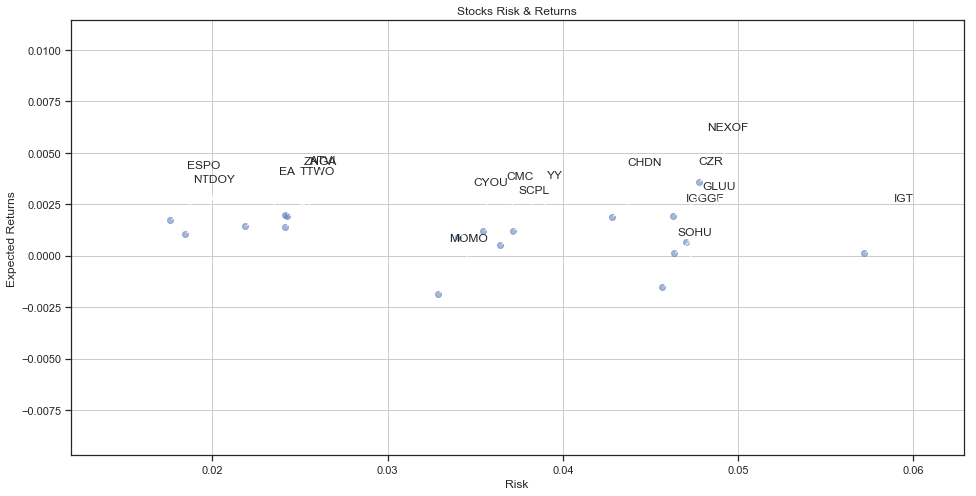

In [19]:
rets = stock_rets.dropna()

plt.figure(figsize=(16,8))
plt.scatter(rets.std(), rets.mean(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.std(), rets.mean()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

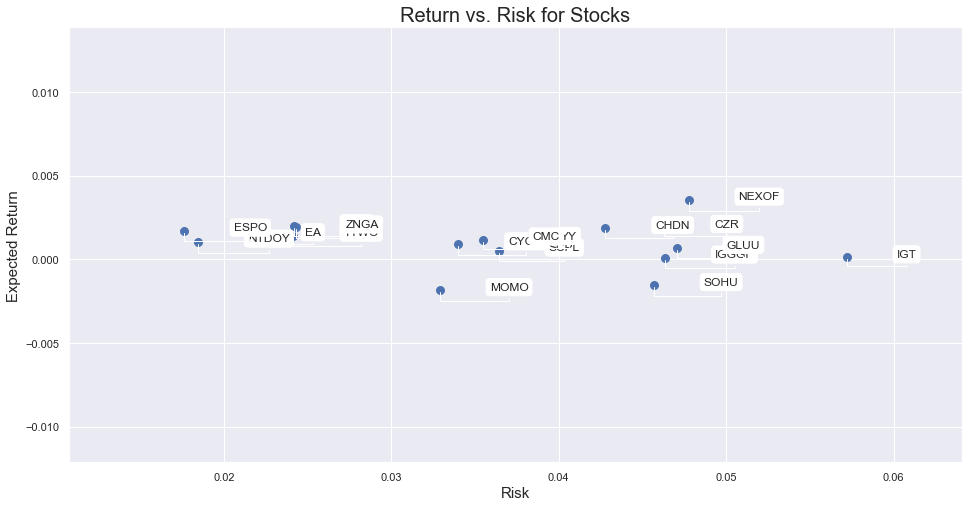

In [20]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(16,8))
plt.scatter(rets.std(), rets.mean(), s=area)
plt.xlabel("Risk", fontsize=15)
plt.ylabel("Expected Return", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.std(), rets.mean()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [21]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

CMC    CMC      1.000000
NEXOF  NEXOF    1.000000
GLUU   GLUU     1.000000
IGT    IGT      1.000000
MOMO   MOMO     1.000000
CHDN   CHDN     1.000000
YY     YY       1.000000
CZR    CZR      1.000000
ZNGA   ZNGA     1.000000
SOHU   SOHU     1.000000
ATVI   ATVI     1.000000
TTWO   TTWO     1.000000
SCPL   SCPL     1.000000
IGGGF  IGGGF    1.000000
ESPO   ESPO     1.000000
NTDOY  NTDOY    1.000000
CYOU   CYOU     1.000000
EA     EA       1.000000
       ATVI     0.769795
ATVI   EA       0.769795
ESPO   EA       0.700928
EA     ESPO     0.700928
ATVI   ESPO     0.700343
ESPO   ATVI     0.700343
TTWO   EA       0.672437
EA     TTWO     0.672437
CMC    CHDN     0.669305
CHDN   CMC      0.669305
IGT    CHDN     0.663151
CHDN   IGT      0.663151
                  ...   
MOMO   IGGGF    0.035994
IGGGF  MOMO     0.035994
CYOU   ZNGA     0.034611
ZNGA   CYOU     0.034611
IGGGF  NTDOY    0.029423
NTDOY  IGGGF    0.029423
IGGGF  CHDN     0.027796
CHDN   IGGGF    0.027796
       NEXOF    0.027594


In [22]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

EA     NTDOY      ESPO     IGGGF      SCPL      TTWO  \
Date                                                                     
2019-05-06  0.518219  0.409265  0.504491  0.306879  0.369190  0.552440   
2019-05-07  0.390781  0.177646  0.396872  0.504326  0.480122  0.470107   
2019-05-08  0.511900  0.558324  0.638220  0.454945  0.503106  0.640910   
2019-05-09  0.416781  0.365847  0.475347  0.348541  0.477204  0.565225   
2019-05-10  0.478751  0.539276  0.668463  0.556262  0.373956  0.608435   

                ATVI      ZNGA     NEXOF       CZR        YY      CHDN  \
Date                                                                     
2019-05-06  0.645066  0.534552  0.436324  0.406431  0.400695  0.449707   
2019-05-07  0.381810  0.382295  0.436324  0.388646  0.345438  0.417084   
2019-05-08  0.552075  0.402307  0.436324  0.404411  0.472605  0.522121   
2019-05-09  0.517529  0.367187  0.436324  0.446860  0.483452  0.541619   
2019-05-10  0.469833  0.436855  0.436324  0.444881  0.422747  0.518846   

                MOMO       IGT      GLUU      CYOU      SOHU       CMC  
Date                                                                    
2019-05-06  0.419356  0.477271  0.650554  0.232529  0.419138  0.506156  
2019-05-07  0.270575  0.420012  0.295015  0.205221  0.440428  0.494285  
2019-05-08  0.525809  0.511637  0.608965  0.226088  0.507522  0.562286  
2019-05-09  0.501216  0.489164  0.553264  0.256949  0.583919  0.612975  
2019-05-10  0.118767  0.501903  0.561354  0.206170  0.485495  0.598652

In [23]:
Normalized_Value.corr()

EA     NTDOY      ESPO     IGGGF      SCPL      TTWO      ATVI  \
EA     1.000000  0.380182  0.700928  0.157182  0.259232  0.672437  0.769795   
NTDOY  0.380182  1.000000  0.545280  0.029423  0.266442  0.341888  0.361275   
ESPO   0.700928  0.545280  1.000000  0.188304  0.310329  0.641774  0.700343   
IGGGF  0.157182  0.029423  0.188304  1.000000 -0.016811  0.131509  0.200993   
SCPL   0.259232  0.266442  0.310329 -0.016811  1.000000  0.192145  0.248373   
TTWO   0.672437  0.341888  0.641774  0.131509  0.192145  1.000000  0.661742   
ATVI   0.769795  0.361275  0.700343  0.200993  0.248373  0.661742  1.000000   
ZNGA   0.567288  0.340067  0.652942  0.070299  0.240408  0.576547  0.643923   
NEXOF -0.011146  0.074306  0.058710 -0.042531  0.009949 -0.004274  0.003669   
CZR    0.245238  0.232519  0.415085 -0.051777  0.389056  0.246298  0.187088   
YY     0.400390  0.230017  0.551762  0.099707  0.080781  0.354249  0.357106   
CHDN   0.266890  0.258081  0.573559  0.027796  0.344550  0.336688  0.273186   
MOMO   0.232537  0.220835  0.400842  0.035994  0.156615  0.193331  0.222235   
IGT    0.153463  0.189643  0.430467  0.092622  0.316277  0.189039  0.134534   
GLUU   0.288126  0.227081  0.330736  0.004558  0.219720  0.300207  0.347538   
CYOU   0.116331  0.091222  0.110731 -0.016021  0.202341  0.075384  0.140093   
SOHU   0.310074  0.200619  0.506717  0.042983  0.240681  0.310798  0.364271   
CMC    0.417896  0.355022  0.619716  0.093465  0.323571  0.352125  0.374468   

           ZNGA     NEXOF       CZR        YY      CHDN      MOMO       IGT  \
EA     0.567288 -0.011146  0.245238  0.400390  0.266890  0.232537  0.153463   
NTDOY  0.340067  0.074306  0.232519  0.230017  0.258081  0.220835  0.189643   
ESPO   0.652942  0.058710  0.415085  0.551762  0.573559  0.400842  0.430467   
IGGGF  0.070299 -0.042531 -0.051777  0.099707  0.027796  0.035994  0.092622   
SCPL   0.240408  0.009949  0.389056  0.080781  0.344550  0.156615  0.316277   
TTWO   0.576547 -0.004274  0.246298  0.354249  0.336688  0.193331  0.189039   
ATVI   0.643923  0.003669  0.187088  0.357106  0.273186  0.222235  0.134534   
ZNGA   1.000000  0.046448  0.227537  0.311999  0.357178  0.221526  0.205244   
NEXOF  0.046448  1.000000  0.015009 -0.014615  0.027594 -0.091048  0.124332   
CZR    0.227537  0.015009  1.000000  0.340210  0.616646  0.349485  0.524989   
YY     0.311999 -0.014615  0.340210  1.000000  0.304584  0.537409  0.365797   
CHDN   0.357178  0.027594  0.616646  0.304584  1.000000  0.327434  0.663151   
MOMO   0.221526 -0.091048  0.349485  0.537409  0.327434  1.000000  0.275994   
IGT    0.205244  0.124332  0.524989  0.365797  0.663151  0.275994  1.000000   
GLUU   0.481572 -0.087753  0.086707  0.144579  0.176078  0.174447  0.103231   
CYOU   0.034611 -0.043627  0.061350  0.096067  0.070140  0.128068  0.093920   
SOHU   0.267029  0.037308  0.378445  0.555499  0.408144  0.509014  0.330625   
CMC    0.321260  0.023054  0.522939  0.422024  0.669305  0.420954  0.542689   

           GLUU      CYOU      SOHU       CMC  
EA     0.288126  0.116331  0.310074  0.417896  
NTDOY  0.227081  0.091222  0.200619  0.355022  
ESPO   0.330736  0.110731  0.506717  0.619716  
IGGGF  0.004558 -0.016021  0.042983  0.093465  
SCPL   0.219720  0.202341  0.240681  0.323571  
TTWO   0.300207  0.075384  0.310798  0.352125  
ATVI   0.347538  0.140093  0.364271  0.374468  
ZNGA   0.481572  0.034611  0.267029  0.321260  
NEXOF -0.087753 -0.043627  0.037308  0.023054  
CZR    0.086707  0.061350  0.378445  0.522939  
YY     0.144579  0.096067  0.555499  0.422024  
CHDN   0.176078  0.070140  0.408144  0.669305  
MOMO   0.174447  0.128068  0.509014  0.420954  
IGT    0.103231  0.093920  0.330625  0.542689  
GLUU   1.000000  0.087568  0.094780  0.214551  
CYOU   0.087568  1.000000  0.255068  0.129624  
SOHU   0.094780  0.255068  1.000000  0.494771  
CMC    0.214551  0.129624  0.494771  1.000000

In [24]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

CMC    CMC      1.000000
NEXOF  NEXOF    1.000000
GLUU   GLUU     1.000000
IGT    IGT      1.000000
MOMO   MOMO     1.000000
CHDN   CHDN     1.000000
YY     YY       1.000000
CZR    CZR      1.000000
ZNGA   ZNGA     1.000000
SOHU   SOHU     1.000000
ATVI   ATVI     1.000000
TTWO   TTWO     1.000000
SCPL   SCPL     1.000000
IGGGF  IGGGF    1.000000
ESPO   ESPO     1.000000
NTDOY  NTDOY    1.000000
CYOU   CYOU     1.000000
EA     EA       1.000000
       ATVI     0.769795
ATVI   EA       0.769795
ESPO   EA       0.700928
EA     ESPO     0.700928
ATVI   ESPO     0.700343
ESPO   ATVI     0.700343
TTWO   EA       0.672437
EA     TTWO     0.672437
CMC    CHDN     0.669305
CHDN   CMC      0.669305
IGT    CHDN     0.663151
CHDN   IGT      0.663151
                  ...   
MOMO   IGGGF    0.035994
IGGGF  MOMO     0.035994
CYOU   ZNGA     0.034611
ZNGA   CYOU     0.034611
IGGGF  NTDOY    0.029423
NTDOY  IGGGF    0.029423
IGGGF  CHDN     0.027796
CHDN   IGGGF    0.027796
       NEXOF    0.027594


In [25]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
EA       0.001435
NTDOY    0.001058
ESPO     0.001715
IGGGF    0.000105
SCPL     0.000520
TTWO     0.001412
ATVI     0.001977
ZNGA     0.001905
NEXOF    0.003572
CZR      0.001935
YY       0.001216
CHDN     0.001872
MOMO    -0.001844
IGT      0.000121
GLUU     0.000685
CYOU     0.000899
SOHU    -0.001541
CMC      0.001184
dtype: float64
--------------------------------------------------
Stock risks:
EA       0.021852
NTDOY    0.018443
ESPO     0.017587
IGGGF    0.046357
SCPL     0.036414
TTWO     0.024151
ATVI     0.024156
ZNGA     0.024281
NEXOF    0.047753
CZR      0.046313
YY       0.037137
CHDN     0.042783
MOMO     0.032884
IGT      0.057194
GLUU     0.047045
CYOU     0.033995
SOHU     0.045675
CMC      0.035453
dtype: float64


In [26]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

Returns      Risk
MOMO  -0.001844  0.032884
SOHU  -0.001541  0.045675
IGGGF  0.000105  0.046357
IGT    0.000121  0.057194
SCPL   0.000520  0.036414
GLUU   0.000685  0.047045
CYOU   0.000899  0.033995
NTDOY  0.001058  0.018443
CMC    0.001184  0.035453
YY     0.001216  0.037137
TTWO   0.001412  0.024151
EA     0.001435  0.021852
ESPO   0.001715  0.017587
CHDN   0.001872  0.042783
ZNGA   0.001905  0.024281
CZR    0.001935  0.046313
ATVI   0.001977  0.024156
NEXOF  0.003572  0.047753

In [27]:
table.sort_values(by='Risk')

Returns      Risk
ESPO   0.001715  0.017587
NTDOY  0.001058  0.018443
EA     0.001435  0.021852
TTWO   0.001412  0.024151
ATVI   0.001977  0.024156
ZNGA   0.001905  0.024281
MOMO  -0.001844  0.032884
CYOU   0.000899  0.033995
CMC    0.001184  0.035453
SCPL   0.000520  0.036414
YY     0.001216  0.037137
CHDN   0.001872  0.042783
SOHU  -0.001541  0.045675
CZR    0.001935  0.046313
IGGGF  0.000105  0.046357
GLUU   0.000685  0.047045
NEXOF  0.003572  0.047753
IGT    0.000121  0.057194

In [28]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

Returns      Risk  Sharpe Ratio
EA     0.001435  0.021852     -0.391945
NTDOY  0.001058  0.018443     -0.484861
ESPO   0.001715  0.017587     -0.471083
IGGGF  0.000105  0.046357     -0.213455
SCPL   0.000520  0.036414     -0.260332
TTWO   0.001412  0.024151     -0.355602
ATVI   0.001977  0.024156     -0.332144
ZNGA   0.001905  0.024281     -0.333407
NEXOF  0.003572  0.047753     -0.134616
CZR    0.001935  0.046313     -0.174138
YY     0.001216  0.037137     -0.236529
CHDN   0.001872  0.042783     -0.189973
MOMO  -0.001844  0.032884     -0.360181
IGT    0.000121  0.057194     -0.172724
GLUU   0.000685  0.047045     -0.198003
CYOU   0.000899  0.033995     -0.267723
SOHU  -0.001541  0.045675     -0.252671
CMC    0.001184  0.035453     -0.248680

In [29]:
table['Max Returns'] = rets.max()

In [30]:
table['Min Returns'] = rets.min()

In [31]:
table['Median Returns'] = rets.median()

In [32]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

Returns      Risk  Sharpe Ratio  Max Returns  Min Returns  \
EA     0.001435  0.021852     -0.391945     0.106649    -0.086441   
NTDOY  0.001058  0.018443     -0.484861     0.080611    -0.062846   
ESPO   0.001715  0.017587     -0.471083     0.068273    -0.088411   
IGGGF  0.000105  0.046357     -0.213455     0.231884    -0.193548   
SCPL   0.000520  0.036414     -0.260332     0.205047    -0.164706   
TTWO   0.001412  0.024151     -0.355602     0.096555    -0.118522   
ATVI   0.001977  0.024156     -0.332144     0.091734    -0.106369   
ZNGA   0.001905  0.024281     -0.333407     0.133829    -0.103817   
NEXOF  0.003572  0.047753     -0.134616     0.291875    -0.225931   
CZR    0.001935  0.046313     -0.174138     0.426136    -0.309804   
YY     0.001216  0.037137     -0.236529     0.159496    -0.158164   
CHDN   0.001872  0.042783     -0.189973     0.210870    -0.220975   
MOMO  -0.001844  0.032884     -0.360181     0.097575    -0.129826   
IGT    0.000121  0.057194     -0.172724     0.343471    -0.334524   
GLUU   0.000685  0.047045     -0.198003     0.255814    -0.364954   
CYOU   0.000899  0.033995     -0.267723     0.493243    -0.143426   
SOHU  -0.001541  0.045675     -0.252671     0.255072    -0.268412   
CMC    0.001184  0.035453     -0.248680     0.121392    -0.173639   

       Median Returns  Total Return  
EA           0.001675     -0.099327  
NTDOY       -0.000035     -0.903612  
ESPO         0.001570      0.368000  
IGGGF        0.000000     -0.623931  
SCPL         0.000000      0.825309  
TTWO         0.001277      0.378922  
ATVI         0.002143      0.833550  
ZNGA         0.000000      1.371309  
NEXOF        0.000000      7.142856  
CZR          0.001477     -0.829879  
YY          -0.001029      0.790351  
CHDN         0.002965      0.949578  
MOMO        -0.001461     -3.466952  
IGT          0.000000     -3.197354  
GLUU        -0.001397      1.729728  
CYOU         0.000000      0.000000  
SOHU        -0.003699      3.991127  
CMC          0.001536      2.749496

In [33]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

Returns      Risk  Sharpe Ratio  Max Returns  Min Returns  \
EA     0.001435  0.021852     -0.391945     0.106649    -0.086441   
NTDOY  0.001058  0.018443     -0.484861     0.080611    -0.062846   
ESPO   0.001715  0.017587     -0.471083     0.068273    -0.088411   
IGGGF  0.000105  0.046357     -0.213455     0.231884    -0.193548   
SCPL   0.000520  0.036414     -0.260332     0.205047    -0.164706   
TTWO   0.001412  0.024151     -0.355602     0.096555    -0.118522   
ATVI   0.001977  0.024156     -0.332144     0.091734    -0.106369   
ZNGA   0.001905  0.024281     -0.333407     0.133829    -0.103817   
NEXOF  0.003572  0.047753     -0.134616     0.291875    -0.225931   
CZR    0.001935  0.046313     -0.174138     0.426136    -0.309804   
YY     0.001216  0.037137     -0.236529     0.159496    -0.158164   
CHDN   0.001872  0.042783     -0.189973     0.210870    -0.220975   
MOMO  -0.001844  0.032884     -0.360181     0.097575    -0.129826   
IGT    0.000121  0.057194     -0.172724     0.343471    -0.334524   
GLUU   0.000685  0.047045     -0.198003     0.255814    -0.364954   
CYOU   0.000899  0.033995     -0.267723     0.493243    -0.143426   
SOHU  -0.001541  0.045675     -0.252671     0.255072    -0.268412   
CMC    0.001184  0.035453     -0.248680     0.121392    -0.173639   

       Median Returns  Total Return  Average Return Days  
EA           0.001675     -0.099327            -0.000001  
NTDOY       -0.000035     -0.903612            -0.000010  
ESPO         0.001570      0.368000             0.000004  
IGGGF        0.000000     -0.623931            -0.000007  
SCPL         0.000000      0.825309             0.000009  
TTWO         0.001277      0.378922             0.000004  
ATVI         0.002143      0.833550             0.000009  
ZNGA         0.000000      1.371309             0.000015  
NEXOF        0.000000      7.142856             0.000076  
CZR          0.001477     -0.829879            -0.000009  
YY          -0.001029      0.790351             0.000009  
CHDN         0.002965      0.949578             0.000010  
MOMO        -0.001461     -3.466952            -0.000039  
IGT          0.000000     -3.197354            -0.000036  
GLUU        -0.001397      1.729728             0.000019  
CYOU         0.000000      0.000000             0.000000  
SOHU        -0.003699      3.991127             0.000043  
CMC          0.001536      2.749496             0.000030

In [34]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

Returns      Risk  Sharpe Ratio  Max Returns  Min Returns  \
EA     0.001435  0.021852     -0.391945     0.106649    -0.086441   
NTDOY  0.001058  0.018443     -0.484861     0.080611    -0.062846   
ESPO   0.001715  0.017587     -0.471083     0.068273    -0.088411   
IGGGF  0.000105  0.046357     -0.213455     0.231884    -0.193548   
SCPL   0.000520  0.036414     -0.260332     0.205047    -0.164706   
TTWO   0.001412  0.024151     -0.355602     0.096555    -0.118522   
ATVI   0.001977  0.024156     -0.332144     0.091734    -0.106369   
ZNGA   0.001905  0.024281     -0.333407     0.133829    -0.103817   
NEXOF  0.003572  0.047753     -0.134616     0.291875    -0.225931   
CZR    0.001935  0.046313     -0.174138     0.426136    -0.309804   
YY     0.001216  0.037137     -0.236529     0.159496    -0.158164   
CHDN   0.001872  0.042783     -0.189973     0.210870    -0.220975   
MOMO  -0.001844  0.032884     -0.360181     0.097575    -0.129826   
IGT    0.000121  0.057194     -0.172724     0.343471    -0.334524   
GLUU   0.000685  0.047045     -0.198003     0.255814    -0.364954   
CYOU   0.000899  0.033995     -0.267723     0.493243    -0.143426   
SOHU  -0.001541  0.045675     -0.252671     0.255072    -0.268412   
CMC    0.001184  0.035453     -0.248680     0.121392    -0.173639   

       Median Returns  Total Return  Average Return Days      CAGR  
EA           0.001675     -0.099327            -0.000001  0.050738  
NTDOY       -0.000035     -0.903612            -0.000010  0.068780  
ESPO         0.001570      0.368000             0.000004       NaN  
IGGGF        0.000000     -0.623931            -0.000007 -0.012082  
SCPL         0.000000      0.825309             0.000009       NaN  
TTWO         0.001277      0.378922             0.000004  0.062633  
ATVI         0.002143      0.833550             0.000009  0.054177  
ZNGA         0.000000      1.371309             0.000015  0.283630  
NEXOF        0.000000      7.142856             0.000076  0.204888  
CZR          0.001477     -0.829879            -0.000009 -0.011349  
YY          -0.001029      0.790351             0.000009 -0.067859  
CHDN         0.002965      0.949578             0.000010  0.160364  
MOMO        -0.001461     -3.466952            -0.000039 -0.085503  
IGT          0.000000     -3.197354            -0.000036 -0.239967  
GLUU        -0.001397      1.729728             0.000019  0.303741  
CYOU         0.000000      0.000000             0.000000       NaN  
SOHU        -0.003699      3.991127             0.000043 -0.356095  
CMC          0.001536      2.749496             0.000030 -0.016179

In [35]:
table.sort_values(by='Average Return Days')

Returns      Risk  Sharpe Ratio  Max Returns  Min Returns  \
MOMO  -0.001844  0.032884     -0.360181     0.097575    -0.129826   
IGT    0.000121  0.057194     -0.172724     0.343471    -0.334524   
NTDOY  0.001058  0.018443     -0.484861     0.080611    -0.062846   
CZR    0.001935  0.046313     -0.174138     0.426136    -0.309804   
IGGGF  0.000105  0.046357     -0.213455     0.231884    -0.193548   
EA     0.001435  0.021852     -0.391945     0.106649    -0.086441   
CYOU   0.000899  0.033995     -0.267723     0.493243    -0.143426   
ESPO   0.001715  0.017587     -0.471083     0.068273    -0.088411   
TTWO   0.001412  0.024151     -0.355602     0.096555    -0.118522   
YY     0.001216  0.037137     -0.236529     0.159496    -0.158164   
SCPL   0.000520  0.036414     -0.260332     0.205047    -0.164706   
ATVI   0.001977  0.024156     -0.332144     0.091734    -0.106369   
CHDN   0.001872  0.042783     -0.189973     0.210870    -0.220975   
ZNGA   0.001905  0.024281     -0.333407     0.133829    -0.103817   
GLUU   0.000685  0.047045     -0.198003     0.255814    -0.364954   
CMC    0.001184  0.035453     -0.248680     0.121392    -0.173639   
SOHU  -0.001541  0.045675     -0.252671     0.255072    -0.268412   
NEXOF  0.003572  0.047753     -0.134616     0.291875    -0.225931   

       Median Returns  Total Return  Average Return Days      CAGR  
MOMO        -0.001461     -3.466952            -0.000039 -0.085503  
IGT          0.000000     -3.197354            -0.000036 -0.239967  
NTDOY       -0.000035     -0.903612            -0.000010  0.068780  
CZR          0.001477     -0.829879            -0.000009 -0.011349  
IGGGF        0.000000     -0.623931            -0.000007 -0.012082  
EA           0.001675     -0.099327            -0.000001  0.050738  
CYOU         0.000000      0.000000             0.000000       NaN  
ESPO         0.001570      0.368000             0.000004       NaN  
TTWO         0.001277      0.378922             0.000004  0.062633  
YY          -0.001029      0.790351             0.000009 -0.067859  
SCPL         0.000000      0.825309             0.000009       NaN  
ATVI         0.002143      0.833550             0.000009  0.054177  
CHDN         0.002965      0.949578             0.000010  0.160364  
ZNGA         0.000000      1.371309             0.000015  0.283630  
GLUU        -0.001397      1.729728             0.000019  0.303741  
CMC          0.001536      2.749496             0.000030 -0.016179  
SOHU        -0.003699      3.991127             0.000043 -0.356095  
NEXOF        0.000000      7.142856             0.000076  0.204888